In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
df=pd.read_csv('train.csv')

In [39]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
# 定义普通称谓
common_titles = ['Mr', 'Miss', 'Mrs']
# 分类：普通人=0，其他=1
df['Title from name'] = df['Title'].apply(lambda x: 0 if x in common_titles else 1)
df = df.drop(columns=['Name','Title','Ticket'])

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title from name
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,0
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [42]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [43]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('U')  # Unknown

In [44]:
df=df.drop(columns="Cabin")

In [45]:
df = pd.get_dummies(df, columns=['Deck'], prefix='Deck')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title from name,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,0,22.0,1,0,7.2500,S,0,False,False,False,False,False,False,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,C,0,False,False,True,False,False,False,False,False,False
2,3,1,3,1,26.0,0,0,7.9250,S,0,False,False,False,False,False,False,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,S,0,False,False,True,False,False,False,False,False,False
4,5,0,3,0,35.0,0,0,8.0500,S,0,False,False,False,False,False,False,False,False,True


In [46]:
df["Embarked"].value_counts()
df=pd.get_dummies(df,columns=["Embarked"])

In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title from name,Deck_A,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,False,...,False,False,False,False,False,False,True,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,0,False,...,True,False,False,False,False,False,False,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,0,False,...,False,False,False,False,False,False,True,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,0,False,...,True,False,False,False,False,False,False,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,0,False,...,False,False,False,False,False,False,True,False,False,True


In [49]:
df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Fare                 0
Title from name      0
Deck_A               0
Deck_B               0
Deck_C               0
Deck_D               0
Deck_E               0
Deck_F               0
Deck_G               0
Deck_T               0
Deck_U               0
Embarked_C           0
Embarked_Q           0
Embarked_S           0
dtype: int64

In [50]:
df['Age'] = df['Age'].fillna(df['Age'].median())

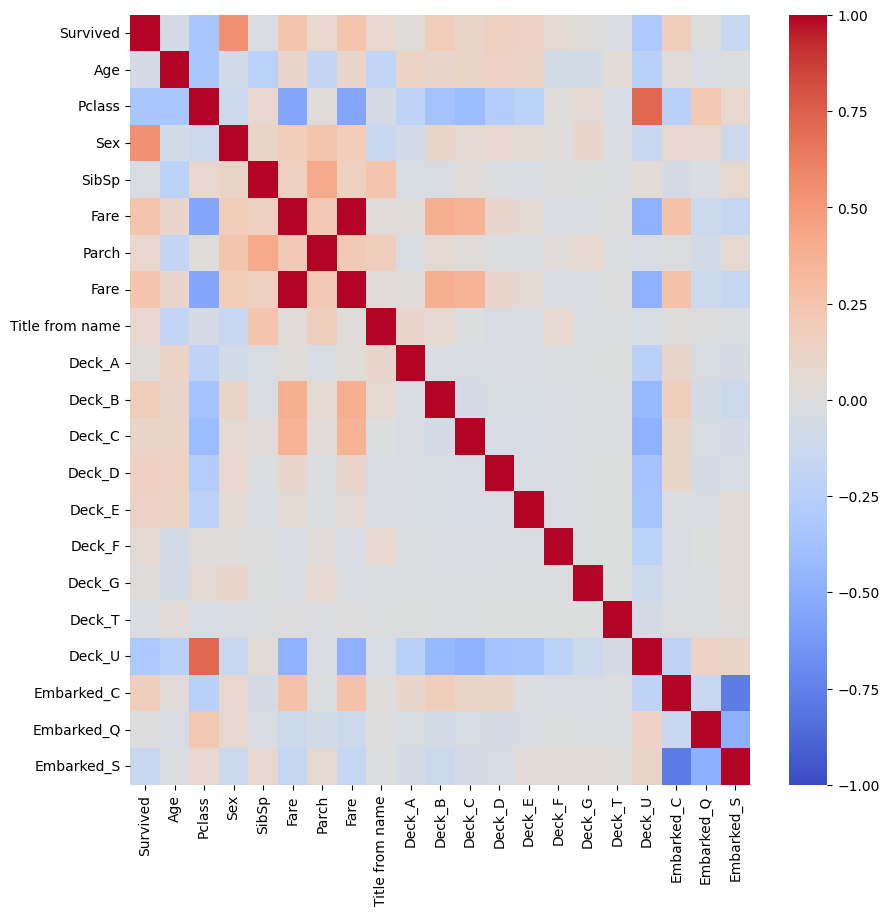

In [56]:
df.columns
corr=df[['Survived','Age','Pclass','Sex','SibSp','Fare','Parch','Fare','Title from name','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Deck_U','Embarked_C','Embarked_Q','Embarked_S']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=False,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [58]:
corr['Survived'].abs().sort_values(ascending=False)

Survived           1.000000
Sex                0.543351
Pclass             0.338481
Deck_U             0.316912
Fare               0.257307
Fare               0.257307
Deck_B             0.175095
Embarked_C         0.168240
Embarked_S         0.155660
Deck_D             0.150716
Deck_E             0.145321
Deck_C             0.114652
Parch              0.081629
Title from name    0.081238
Age                0.064910
Deck_F             0.057935
SibSp              0.035322
Deck_T             0.026456
Deck_A             0.022287
Deck_G             0.016040
Embarked_Q         0.003650
Name: Survived, dtype: float64

In [59]:
#筛选特征
from sklearn.ensemble import RandomForestClassifier
# 假设 df 是你的训练数据，y 是 Survived
X = df.drop(columns=['Survived'])
y = df['Survived']
# 简单随机森林
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
# 输出特征重要性
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

Sex                0.220099
PassengerId        0.183045
Fare               0.178378
Age                0.165172
Pclass             0.064523
Deck_U             0.039979
SibSp              0.036786
Parch              0.028907
Embarked_S         0.014897
Title from name    0.013811
Embarked_C         0.012672
Embarked_Q         0.008435
Deck_E             0.008134
Deck_B             0.006914
Deck_C             0.006348
Deck_D             0.005114
Deck_A             0.004153
Deck_F             0.001495
Deck_G             0.000878
Deck_T             0.000260
dtype: float64

In [60]:
drop_cols = [
    'PassengerId', 'Embarked_Q',
    'Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T'
]

df = df.drop(columns=drop_cols)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=df.drop(columns=['Survived'])
y=df['Survived']
model=LogisticRegression(max_iter=1000)
model.fit(X,y)
y_pred=model.predict(X)
acc=accuracy_score(y,y_pred)
print('Traning Accuracy:',acc)


Traning Accuracy: 0.8181818181818182
